In [1]:
import numpy as np

from astropy.io import  fits

from SOSS.extract import soss_read_refs
from SOSS.dms import soss_syscor

import matplotlib.pyplot as plt

plt.rc('figure', figsize=(13,8))
plt.rc('font', size=16)
plt.rc('image', cmap='inferno')
plt.rc('lines', lw=2)

# Test the 1/f correction.

Read some data. (You may need to download the data and change the paths.)

In [2]:
deepstack = fits.getdata('/home/talens-irex/Downloads/deepstack.fits')
deepstack = np.rot90(deepstack)

cube = fits.getdata('/home/talens-irex/Downloads/cds_256_ng3.fits')
scidata = np.rot90(cube[10, :, :])
scimask = ~np.isfinite(scidata)

Perform the 1/f correction.

In [3]:
bkg_mask = soss_syscor.make_background_mask(deepstack)
scidata_cor, col_cor, npix_cor, bias = soss_syscor.soss_oneoverf_correction(scidata, scimask, deepstack, bkg_mask=bkg_mask)

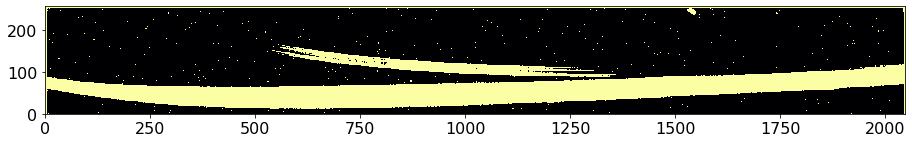

In [4]:
plt.imshow(bkg_mask, interpolation='None', origin='lower')

plt.tight_layout()
plt.show()

-4.622784446460049


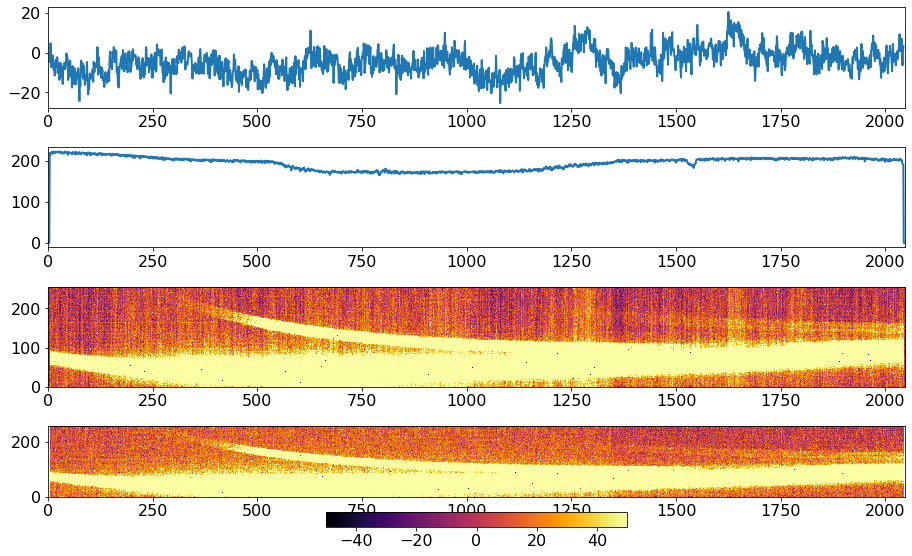

In [5]:
print(bias)

ax = plt.subplot(411)
plt.plot(col_cor)

plt.subplot(412, sharex=ax)
plt.plot(npix_cor)

plt.subplot(413, sharex=ax)
plt.imshow(scidata, vmin=-50, vmax=50, aspect='auto', interpolation='None', origin='lower')

plt.subplot(414, sharex=ax)
plt.imshow(scidata_cor, vmin=-50, vmax=50, aspect='auto', interpolation='None', origin='lower')

plt.colorbar(orientation='horizontal')

plt.tight_layout()
plt.show()

# Test the background correction on the 1/f corrected data.

This might need further refinement.

In [6]:
# soss_read_refs.PATH = '/home/talens-irex/Dropbox/SOSS_Ref_Files
# reference = soss_read_refs.Ref2dProfile()
# ref_2d_profile = reference()

In [7]:
# bkg_mask = soss_syscor.make_profile_mask(ref_2d_profile)  # Masked based on 2D profile.
bkg_mask = soss_syscor.make_background_mask(deepstack, width=50)  # Aggresive mask based on deepstack.
scidata_bkg, col_bkg, npix_bkg = soss_syscor.soss_background(scidata_cor, scimask, bkg_mask=bkg_mask)

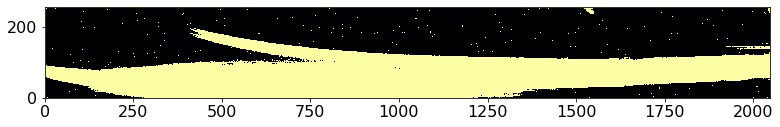

In [8]:
plt.imshow(bkg_mask, interpolation='None', origin='lower')
plt.show()

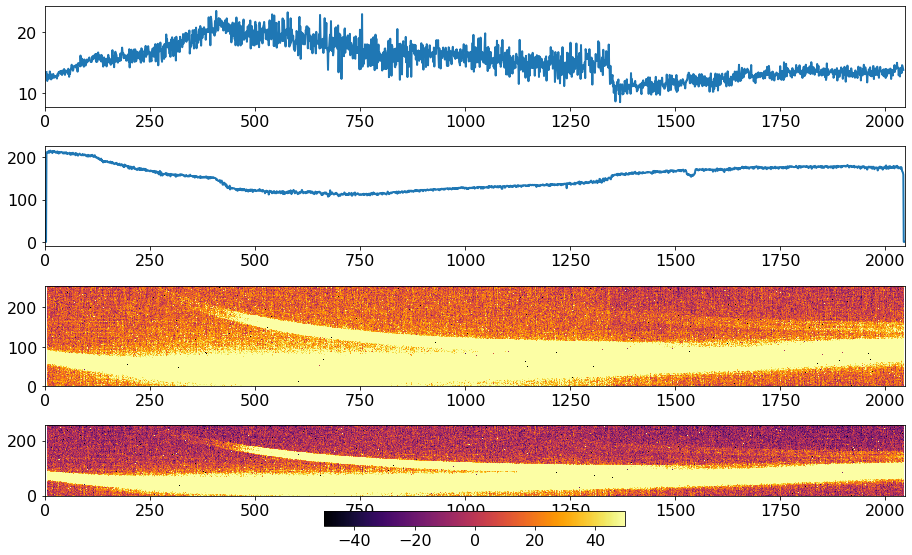

In [9]:
ax = plt.subplot(411)
plt.plot(col_bkg)

plt.subplot(412, sharex=ax)
plt.plot(npix_bkg)

plt.subplot(413, sharex=ax)
plt.imshow(scidata_cor, vmin=-50, vmax=50, aspect='auto', interpolation='None', origin='lower')

plt.subplot(414, sharex=ax)
plt.imshow(scidata_bkg, vmin=-50, vmax=50, aspect='auto', interpolation='None', origin='lower')

plt.colorbar(orientation='horizontal')

plt.tight_layout()
plt.show()